# Библиотека Pandas

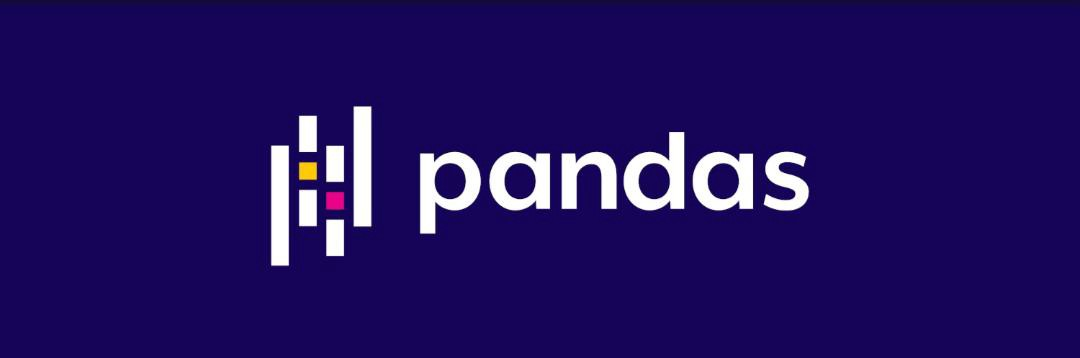

## Библиотека Pandas

**Pandas** - это высокоуровневая библиотека для анализа данных.

Построена она поверх более низкоуровневой библиотеки NumPy, что значительно увеличивает ее производительность. В экосистеме Python, **pandas** является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных. 

In [1]:
import pandas as pd

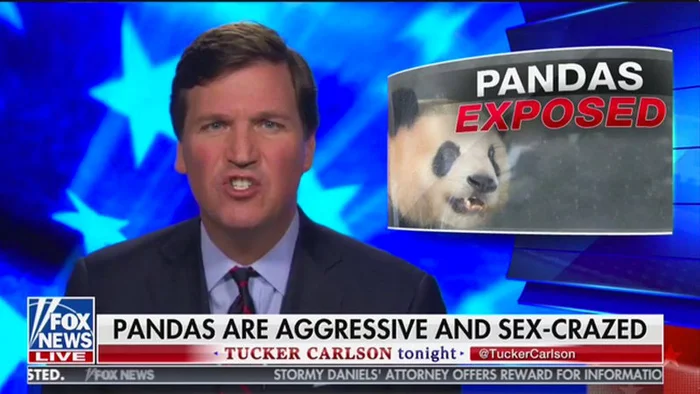

### Что дает нам Pandas?

Основная сила библиотеки - в предоставляемых классах **`Series`** и **`DataFrame`**.

### `pandas.Series`

In [2]:
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [3]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [4]:
my_series.values

array([ 5,  6,  7,  8,  9, 10])

In [5]:
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64

In [6]:
my_series2.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

Можно **запрашивать значения по списку индексов**, вернется новый `Series`

In [7]:
my_series[[4]]

4    9
dtype: int64

In [8]:
my_series2[['a']]

a    5
dtype: int64

По списку значений можно также и **присваивать**!

In [9]:
my_series2[['a', 'b', 'f']] = 0
my_series2

a    0
b    0
c    7
d    8
e    9
f    0
dtype: int64

Как и в NumPy, в Pandas можно фильтровать "списки".

In [10]:
my_series2[(my_series2 > 0)]

c    7
d    8
e    9
dtype: int64

Можно создать `Series` **из словаря**:

In [11]:
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

А также у `Series` и его индекса могут быть названия:

In [12]:
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

Но сам по себе `pandas.Series` не сильно полезнее обычного словаря.

Объект становится полезным, когда в игру входит

### `pandas.DataFrame`

Объект `DataFrame` лучше всего представлять себе в виде обычной таблицы. Идея `DataFrame` - табличная организация структуры данных.

В любой таблице всегда присутствуют строки и столбцы. Ранее рассмотренные объекты `Series` являются столбцами в `DataFrame`, а строки в последних составлены непосредственно из элементов `Series`.

### **Почему строки, а не столбцы?**

Создать `pd.DataFrame` можно, к примеру, из **словаря списков**:

In [13]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})
df

country  population    square
0  Kazakhstan       17.04   2724902
1      Russia      143.50  17125191
2     Belarus        9.50    207600
3     Ukraine       45.50    603628

Запрашивать столбец можно двумя способами:

In [14]:
df.population  # A

0     17.04
1    143.50
2      9.50
3     45.50
Name: population, dtype: float64

In [15]:
df["population"]  # B

0     17.04
1    143.50
2      9.50
3     45.50
Name: population, dtype: float64

Если в названии колонки есть пробелы, какой способ нужно использовать?

Можно разом **заменить индекс для всех колонок**:

In [16]:
df

country  population    square
0  Kazakhstan       17.04   2724902
1      Russia      143.50  17125191
2     Belarus        9.50    207600
3     Ukraine       45.50    603628

In [17]:
df.index = ['KZ', 'RU', 'BY', 'UA']
df

country  population    square
KZ  Kazakhstan       17.04   2724902
RU      Russia      143.50  17125191
BY     Belarus        9.50    207600
UA     Ukraine       45.50    603628

## Импортируем данные!

    pd.read_csv(filename)
    pd.read_excel(filename)
    pd.read_sql(query, connection_object) 
    pd.read_table(filename)
    pd.read_json(json_string)
    pd.read_html(url) 
    pd.read_clipboard()
    pd.DataFrame(dict)

In [18]:
titanic = pd.read_csv("./titanic.csv", sep=",")
titanic.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [19]:
c_size = 200 

for gm_chunk in pd.read_csv("./titanic.csv", sep = ",", chunksize=c_size):
    print(gm_chunk.shape)

(200, 12)
(200, 12)
(200, 12)
(200, 12)
(91, 12)


## Экспортируем данные!

    df.to_csv(filename) 
    df.to_excel(filename) 
    df.to_sql(table_name, connection_object)
    df.to_json(filename)
    df.to_html(filename)
    df.to_clipboard()

**Дополнительно**: разобраться, как записать CSV-файл без заголовка и индекса.

## Запрашиваем данные у `DataFrame`

Доступ к строкам по индексу возможен несколькими способами:

- `df.loc` - используется для доступа по ключу;
- `df.iloc` - используется для доступа по числовому значению (начиная от 0).

In [20]:
df.loc['KZ']

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [21]:
df.iloc[0]

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

Можно запросить срез **одновременно по строкам и колонкам**:

In [22]:
df.loc[['KZ', 'RU'], 'population']

KZ     17.04
RU    143.50
Name: population, dtype: float64

In [23]:
df.iloc[[0, 1],1]

KZ     17.04
RU    143.50
Name: population, dtype: float64

In [24]:
df.iloc[[0, 1],[1]]

population
KZ       17.04
RU      143.50

### В каком случае возвращается `Series`, а в каком `DataFrame`?

1. `df.iloc[[0],1]`
2. `df.iloc[[0, 1],1]`
3. `df.iloc[0,[1, 2]]`
4. `df.iloc[[0, 1],[1, 2]]`

**A)** Число, `Series`, `DataFrame`, `DataFrame`;

**B)** Число, `DataFrame`, `Series`, `DataFrame`;

**C)** `Series`, `DataFrame`, `DataFrame`, `DataFrame`;

**D)** `Series`, `Series`, `Series`, `DataFrame`

## Правильный ответ **D**

**Запомните:** в индексации `.loc` и `.iloc` первый индекс относится к строкам, а второй - к столбцам!

In [25]:
df.iloc[[0, 1],[1]]

population
KZ       17.04
RU      143.50

Фильтрация **всего `DataFrame`** по значениям колонок:

In [26]:
titanic[titanic["Age"] > 60][["Name", "Ticket", "Fare"]].head(3)

Name      Ticket     Fare
33           Wheadon, Mr. Edward H  C.A. 24579  10.5000
54  Ostby, Mr. Engelhart Cornelius      113509  61.9792
96       Goldschmidt, Mr. George B    PC 17754  34.6542

In [27]:
titanic[(titanic.Age < 10) & (titanic.Sex == "male")][["Name", "Fare"]].head(4)

Name     Fare
7   Palsson, Master. Gosta Leonard  21.0750
16            Rice, Master. Eugene  29.1250
50      Panula, Master. Juha Niilo  39.6875
63           Skoog, Master. Harald  27.9000

Фильтры можно хранить в отдельных переменных. Это позволяет делать крайне сложные условия и **не путаться**.

In [28]:
filters = (titanic.Pclass == 3)
titanic[filters].head()

PassengerId  Survived  Pclass                            Name     Sex  \
0            1         0       3         Braund, Mr. Owen Harris    male   
2            3         1       3          Heikkinen, Miss. Laina  female   
4            5         0       3        Allen, Mr. William Henry    male   
5            6         0       3                Moran, Mr. James    male   
7            8         0       3  Palsson, Master. Gosta Leonard    male   

    Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0  22.0      1      0         A/5 21171   7.2500   NaN        S  
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
4  35.0      0      0            373450   8.0500   NaN        S  
5   NaN      0      0            330877   8.4583   NaN        Q  
7   2.0      3      1            349909  21.0750   NaN        S

Мы можем **создавать новые колонки** в `DataFrame`:

In [29]:
df

country  population    square
KZ  Kazakhstan       17.04   2724902
RU      Russia      143.50  17125191
BY     Belarus        9.50    207600
UA     Ukraine       45.50    603628

In [30]:
df['density'] = df['population'] / df['square'] * 1000000
df

country  population    square    density
KZ  Kazakhstan       17.04   2724902   6.253436
RU      Russia      143.50  17125191   8.379469
BY     Belarus        9.50    207600  45.761079
UA     Ukraine       45.50    603628  75.377550

...и **удалять колонки**:

In [31]:
x = df.drop(['density'], axis=1)

In [32]:
df

country  population    square    density
KZ  Kazakhstan       17.04   2724902   6.253436
RU      Russia      143.50  17125191   8.379469
BY     Belarus        9.50    207600  45.761079
UA     Ukraine       45.50    603628  75.377550

Обратите внимание, что при удалении столбца `DataFrame` **копируется**. Чтобы этого избежать, [почти] у всех неявно копирующих функций есть опция `inplace`. 

In [33]:
df.drop(['density'], axis=1, inplace=True)
df

country  population    square
KZ  Kazakhstan       17.04   2724902
RU      Russia      143.50  17125191
BY     Belarus        9.50    207600
UA     Ukraine       45.50    603628

Если вы указываете **`inplace=True`**, то функция при выполнении вернет `None` и **изменит исходный объект**.

Можно переименовывать столбцы с помощью словаря:

In [34]:
df.rename(columns={"population": "on_vacation", "weird": "even_stranger"})

country  on_vacation    square
KZ  Kazakhstan        17.04   2724902
RU      Russia       143.50  17125191
BY     Belarus         9.50    207600
UA     Ukraine        45.50    603628

И можно смотреть на наиболее выделяющиеся значения без сортировки:

In [35]:
titanic.nlargest(3, "Age")

PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   
96            97         0       1             Goldschmidt, Mr. George B   

      Sex   Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
630  male  80.0      0      0     27042  30.0000   A23        S  
851  male  74.0      0      0    347060   7.7750   NaN        S  
96   male  71.0      0      0  PC 17754  34.6542    A5        C

In [36]:
titanic.nsmallest(3, "Fare")

PassengerId  Survived  Pclass                          Name   Sex   Age  \
179          180         0       3           Leonard, Mr. Lionel  male  36.0   
263          264         0       1         Harrison, Mr. William  male  40.0   
271          272         1       3  Tornquist, Mr. William Henry  male  25.0   

     SibSp  Parch  Ticket  Fare Cabin Embarked  
179      0      0    LINE   0.0   NaN        S  
263      0      0  112059   0.0   B94        S  
271      0      0    LINE   0.0   NaN        S

## По-настоящему работаем с данными в Pandas

Источник датасета "Titanic" - https://www.kaggle.com

Загрузим данные:

In [37]:
df = pd.read_csv("./titanic.csv", sep=",")

In [38]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Посмотрим на характеристики наших данных:

In [39]:
df.shape

(891, 12)

In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Посмотреть характеристики числовых признаков (фичей) можно с помощью метода `df.describe`:

In [41]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [42]:
df.describe(include=['object'])

Name   Sex    Ticket Cabin Embarked
count                         891   891       891   204      889
unique                        891     2       681   147        3
top     Dodge, Master. Washington  male  CA. 2343    G6        S
freq                            1   577         7     4      644

Можно посмотреть распределения и по нечисловым признакам:

In [43]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


В случае работы с большими датасетами занимаемая память может быть критична.

In [45]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 0.00 MB
Average memory usage for int columns: 0.01 MB
Average memory usage for object columns: 0.04 MB


Можно поменять тип колонок, если необходимо:

In [46]:
import numpy as np

In [47]:
df['Survived'] = df['Survived'].astype(bool)
df['Fare'] = df['Fare'].astype(np.float32)

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float32
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: bool(1), float32(1), float64(1), int64(4), object(5)
memory usage: 74.1+ KB
None


Объём занимаемой памяти уменьшился с 83 kB до 74 kB. Для огромных датасетов это даст приличное количество свободной памяти.

В Pandas есть специальный тип данных - `category`.

Он позволяет более эффективно работать, **внезапно**, с категориальными признаками.

### Что такое эти ваши категориальные признаки?

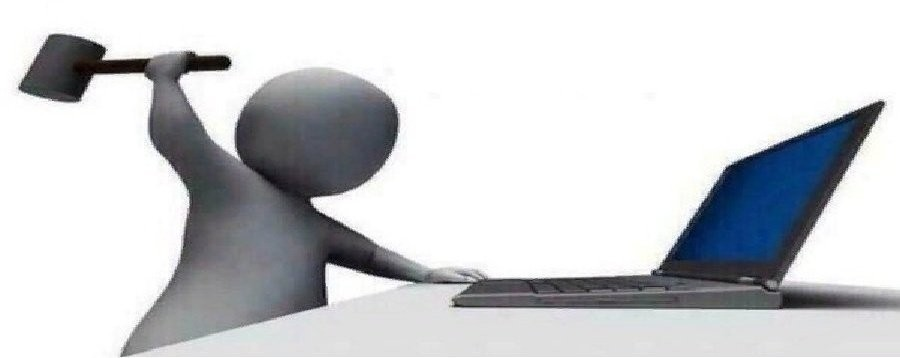

In [49]:
[(col, df[col].nunique()) for col in df.columns]

[('PassengerId', 891),
 ('Survived', 2),
 ('Pclass', 3),
 ('Name', 891),
 ('Sex', 2),
 ('Age', 88),
 ('SibSp', 7),
 ('Parch', 7),
 ('Ticket', 681),
 ('Fare', 248),
 ('Cabin', 147),
 ('Embarked', 3)]

Сделаем один из признаков категориальным!

In [50]:
df_with_cat = df.copy()

In [51]:
df_with_cat['Pclass'] = df_with_cat['Pclass'].astype('category')

Зачем нужны категориальные признаки в Pandas:
- позволяют **более эффективно** обрабатывать категориальные признаки;
- многие другие библиотеки в Python имеют **встроенные методы** по работе с категориальными признаками;
- такие признаки занимают меньше памяти и **положительно сказываются на производительности**.

In [52]:
print(df_with_cat.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null bool
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float32
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: bool(1), category(1), float32(1), float64(1), int64(3), object(5)
memory usage: 68.1+ KB
None


In [53]:
df.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154686
2    20.662184
3    13.675550
Name: Fare, dtype: float32

In [54]:
%%timeit
df_with_cat.groupby("Pclass")["Fare"].mean()

638 µs ± 42.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
%%timeit
df.groupby("Pclass")["Fare"].mean()

654 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Вы также можете **сортировать данные** по нескольким колонкам сразу:

In [56]:
df.sort_values(by=['Pclass', 'Fare'], ascending=[True, False]).head(8)

PassengerId  Survived  Pclass                                Name  \
258          259      True       1                    Ward, Miss. Anna   
679          680      True       1  Cardeza, Mr. Thomas Drake Martinez   
737          738      True       1              Lesurer, Mr. Gustave J   
27            28     False       1      Fortune, Mr. Charles Alexander   
88            89      True       1          Fortune, Miss. Mabel Helen   
341          342      True       1      Fortune, Miss. Alice Elizabeth   
438          439     False       1                   Fortune, Mr. Mark   
311          312      True       1          Ryerson, Miss. Emily Borie   

        Sex   Age  SibSp  Parch    Ticket        Fare            Cabin  \
258  female  35.0      0      0  PC 17755  512.329224              NaN   
679    male  36.0      0      1  PC 17755  512.329224      B51 B53 B55   
737    male  35.0      0      0  PC 17755  512.329224             B101   
27     male  19.0      3      2     19950  263.000000      C23 C25 C27   
88   female  23.0      3      2     19950  263.000000      C23 C25 C27   
341  female  24.0      3      2     19950  263.000000      C23 C25 C27   
438    male  64.0      1      4     19950  263.000000      C23 C25 C27   
311  female  18.0      2      2  PC 17608  262.375000  B57 B59 B63 B66   

    Embarked  
258        C  
679        C  
737        C  
27         S  
88         S  
341        S  
438        S  
311        C

Можно применить функцию к **целым колонкам или строкам**, свернув их (`DataFrame.apply`):

In [57]:
df[["Age", "Fare"]].apply(np.max)

Age      80.000000
Fare    512.329224
dtype: float64

In [58]:
df[["Age", "Fare"]].apply(np.max, axis=0)

Age      80.000000
Fare    512.329224
dtype: float64

In [59]:
df[["Age", "Fare"]].apply(np.max, axis=1).head(4)  # senseless usage

0    22.000000
1    71.283302
2    26.000000
3    53.099998
dtype: float64

Или применить к каждому значению в отдельной колонке (`Series.apply`):

In [60]:
df.Fare.apply(np.log2).head(10)

0    2.857981
1    6.155492
2    2.986411
3    5.730640
4    3.008989
5    3.080368
6    5.696620
7    4.397461
8    3.476809
9    4.910291
Name: Fare, dtype: float32

Как можно с помощью `DataFrame.apply` или `Series.apply`, например, **найти всех Авраамов** в таблице?

In [61]:
is_abe = lambda x: "Abraham" in x

In [62]:
abrahams = df[df['Name'].apply(is_abe)]
abrahams

PassengerId  Survived  Pclass                                Name   Sex  \
785          786     False       3  Harmer, Mr. Abraham (David Lishin)  male   
824          825     False       3        Panula, Master. Urho Abraham  male   

      Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
785  25.0      0      0   374887   7.2500   NaN        S  
824   2.0      4      1  3101295  39.6875   NaN        S

In [63]:
abrahams["Fare"].mean()

23.46875

Еще раз можно посмотреть на распределение нечислового признака:

In [64]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
sex_code = {'female' : 1, 'male' : 0}

In [66]:
df['Sex_code'] = df['Sex'].map(sex_code)
df.tail(3)

PassengerId  Survived  Pclass                                      Name  \
888          889     False       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890      True       1                     Behr, Mr. Karl Howell   
890          891     False       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket       Fare Cabin Embarked  \
888  female   NaN      1      2  W./C. 6607  23.450001   NaN        S   
889    male  26.0      0      0      111369  30.000000  C148        C   
890    male  32.0      0      0      370376   7.750000   NaN        Q   

     Sex_code  
888         1  
889         0  
890         0

**Каким еще [рассмотренным ранее] методом легко добиться похожего результата**?

**Как мы группируем данные (особенно по категориальным признакам)?**

`DataFrame.groupby(by="attribute")`

`DataFrame.groupby(by=["att1", "att2", ...])`

In [67]:
df.groupby(by="Embarked")

In [68]:
df.groupby(by="Embarked")

Чтобы работать с данными дальше, можно выбрать одну или несколько колонок для обработки и *нужно* применить к этому объекту **агрегирующую функцию**! (помните, что это?)

In [69]:
df.groupby(by=["Embarked", "Sex"])["Fare"].mean()

Embarked  Sex   
C         female    75.169807
          male      48.262112
Q         female    12.634958
          male      13.838922
S         female    38.740929
          male      21.711996
Name: Fare, dtype: float32

При этом "*навесить*" функцию сверху на объект **не выйдет**!

In [70]:
np.mean(df.groupby(by=["Embarked", "Sex"])["Fare"])

UnsupportedFunctionCall: numpy operations are not valid with groupby. Use .groupby(...).mean() instead

Вместо этого есть **специальный метод**:

In [71]:
df.groupby(by=["Embarked", "Sex"])["Fare"].agg(np.mean)

Embarked  Sex   
C         female    75.169807
          male      48.262112
Q         female    12.634958
          male      13.838922
S         female    38.740929
          male      21.711996
Name: Fare, dtype: float32

С его помощью можно **сразу применить несколько функций**!

In [72]:
df.groupby(by=["Embarked", "Sex"])["Fare"].agg([np.mean, np.std, np.min, np.max])

mean        std    amin        amax
Embarked Sex                                             
C        female  75.169807  83.574379  7.2250  512.329224
         male    48.262112  82.715096  4.0125  512.329224
Q        female  12.634958  14.298841  6.7500   90.000000
         male    13.838922  14.243486  6.7500   90.000000
S        female  38.740929  46.047878  7.2500  263.000000
         male    21.711996  28.584698  0.0000  263.000000

И, наконец, в Pandas можно делать **сводные таблицы**! (Прямо как в Excel)

In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_code'],
      dtype='object')

In [74]:
pd.crosstab(df["Sex"], df["Pclass"])

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347

In [75]:
pd.crosstab(df["Sex"], df["Pclass"], normalize=True)

Pclass         1         2         3
Sex                                 
female  0.105499  0.085297  0.161616
male    0.136925  0.121212  0.389450

## `merge`, `join` и `concatenate`

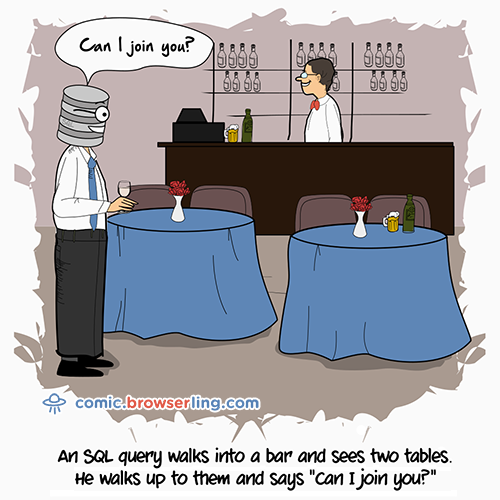

Пусть у нас есть 2 `DataFrame` с одинаковыми колонками (**обратите внимание на индекс!**):

In [76]:
raw_data = {'subject_id': ['1', '2', '3', '4', '5'],
            'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
            'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_a.index = [0, 1, 2, 3, 4]

In [77]:
df_a

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches

In [78]:
raw_data = {'subject_id': ['4', '5', '6', '7', '8'],
            'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
            'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])
df_b.index = [2, 3, 4, 5, 6]

In [79]:
df_b

subject_id first_name last_name
2          4      Billy    Bonder
3          5      Brian     Black
4          6       Bran   Balwner
5          7      Bryce     Brice
6          8      Betty    Btisan

И еще один `DataFrame` с другими колонками:

In [80]:
raw_data = {'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
            'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data, columns = ['subject_id','test_id'])

In [81]:
df_n

subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16

Функция `pandas.concat` используется для **соединения набора таблиц** `DataFrame` по вертикали:

In [82]:
df_new = pd.concat([df_a, df_b])  # axis=0
df_new

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
2          4      Billy    Bonder
3          5      Brian     Black
4          6       Bran   Balwner
5          7      Bryce     Brice
6          8      Betty    Btisan

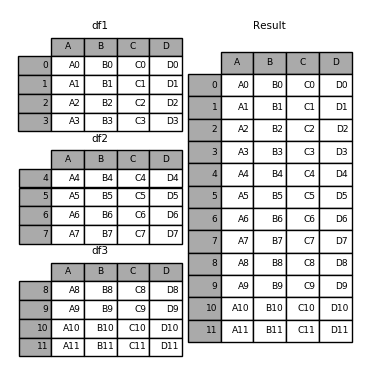

И, как вы наверняка догадались, также возможно объединение **по горизонтали** при установке параметра `axis=1`:

In [83]:
df_new2 = pd.concat([df_a, df_b], axis=1)

Как вы думаете, какая будет **высота** (количество строк) `df_new2`?

In [84]:
df_new2

subject_id first_name last_name subject_id first_name last_name
0          1       Alex  Anderson        NaN        NaN       NaN
1          2        Amy  Ackerman        NaN        NaN       NaN
2          3      Allen       Ali          4      Billy    Bonder
3          4      Alice      Aoni          5      Brian     Black
4          5     Ayoung   Atiches          6       Bran   Balwner
5        NaN        NaN       NaN          7      Bryce     Brice
6        NaN        NaN       NaN          8      Betty    Btisan

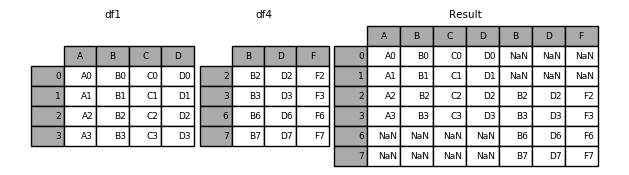

### Что такое `NaN`?

Объект `NaN` а самом деле приходит **еще из NumPy**, но в основном встречаться с ним придется в Pandas.

## Quiz™

Что вернет `np.nan in [np.nan]`?

In [85]:
np.nan in [np.nan]

True

Что вернет `np.nan == np.nan`?

In [86]:
np.nan == np.nan

False

Что вернет `np.nan is np.nan`?

In [87]:
np.nan is np.nan

True

`NaN` означает "**Not A Number**". Это стандартное представление неизвестных/**неполных**/недостающих **данных** в программировании.

In [88]:
np.nan + 19

nan

In [89]:
np.nan - np.nan

nan

In [90]:
np.isnan(np.nan), np.isnan(False)

(True, False)

In [91]:
np.isnan(None)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

В Pandas также есть функция для проверки на то, является ли объект NaN:

In [92]:
pd.isna(np.nan), pd.isnull(np.nan)

(True, True)

In [93]:
pd.isna is pd.isnull

True

Эти функции можно также применять и **к массивам**:

In [94]:
a = np.array([1.0, 2.5, np.nan, np.pi])

In [95]:
np.isnan(a)

array([False, False,  True, False])

In [96]:
pd.isna(a)

array([False, False,  True, False])

Но функцию из NumPy применить к массиву типа, отличного от `float`, не получится:

In [97]:
b = pd.Series(["alpha", "beta", np.nan])

In [98]:
np.isnan(b)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [99]:
b = pd.Series(["alpha", "beta", np.nan])

In [100]:
pd.isna(b)

0    False
1    False
2     True
dtype: bool

### Как выкинуть строки с NaN из таблицы?

In [101]:
~pd.isna(df).any(axis=1)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Length: 891, dtype: bool

In [102]:
df[~pd.isna(df).any(axis=1)].head(4)

PassengerId  Survived  Pclass  \
1             2      True       1   
3             4      True       1   
6             7     False       1   
10           11      True       3   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   

    Parch    Ticket       Fare Cabin Embarked  Sex_code  
1       0  PC 17599  71.283302   C85        C         1  
3       0    113803  53.099998  C123        S         1  
6       0     17463  51.862499   E46        S         0  
10      1   PP 9549  16.700001    G6        S         1

### Вернемся к склеиванию таблиц:

In [103]:
df_a

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches

In [104]:
df_b

subject_id first_name last_name
2          4      Billy    Bonder
3          5      Brian     Black
4          6       Bran   Balwner
5          7      Bryce     Brice
6          8      Betty    Btisan

На самом деле, существуют различные типы склейки - в зависимости от следующих соображений:
* Нужны ли вам данные, присутствующие в обеих таблицах сразу, или только в одной;
* Как вам нужно организовать новую таблицу.

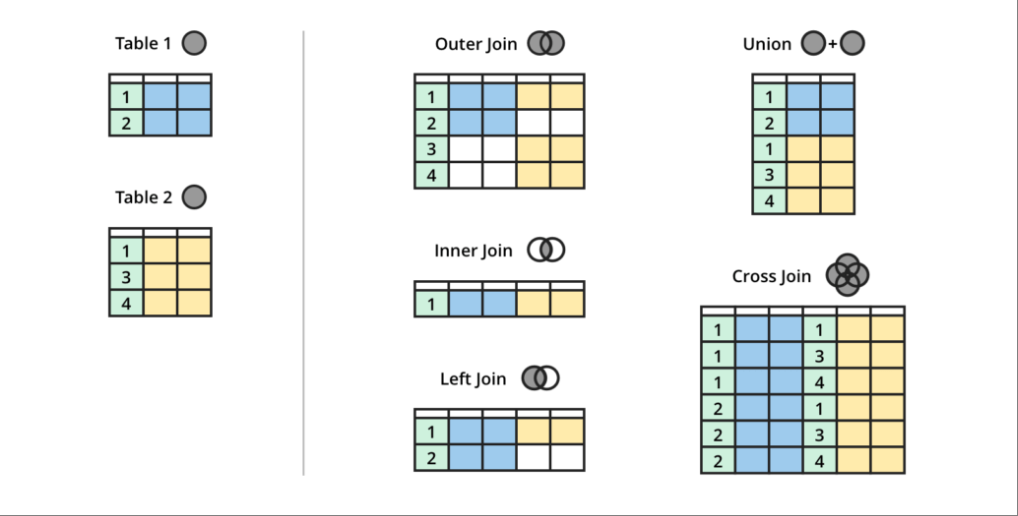

Например, если объединить `df_a` и `df_b` по типу `inner`, то вы получите:

In [105]:
df_new3 = pd.concat([df_a, df_b], axis=1, join="inner")
df_new3

subject_id first_name last_name subject_id first_name last_name
2          3      Allen       Ali          4      Billy    Bonder
3          4      Alice      Aoni          5      Brian     Black
4          5     Ayoung   Atiches          6       Bran   Balwner

Метод `.append` - частный случай функции `pd.concat` с параметрами (`axis=0`, `join='outer'`):

In [106]:
df_a.append(df_b)

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
2          4      Billy    Bonder
3          5      Brian     Black
4          6       Bran   Balwner
5          7      Bryce     Brice
6          8      Betty    Btisan

Метод `.join` основан на объединении таблиц через индексы (способ объединения указывается с помощью параметра `how="<left|right|inner|outer>"`).

In [107]:
df_a.join(df_b, how="left")

ValueError: columns overlap but no suffix specified: Index(['subject_id', 'first_name', 'last_name'], dtype='object')

In [108]:
df_a.join(df_b, rsuffix="_second", how="left")

subject_id first_name last_name subject_id_second first_name_second  \
0          1       Alex  Anderson               NaN               NaN   
1          2        Amy  Ackerman               NaN               NaN   
2          3      Allen       Ali                 4             Billy   
3          4      Alice      Aoni                 5             Brian   
4          5     Ayoung   Atiches                 6              Bran   

  last_name_second  
0              NaN  
1              NaN  
2           Bonder  
3            Black  
4          Balwner

Функция `pandas.merge` используется для объединения таблиц **по любым колонкам** с помощью методов`on`, `left_on` и `right_on`.

(Вспомним, что у нас лежит в переменных `df_new` и `df_n`)

In [109]:
df_new

subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
2          4      Billy    Bonder
3          5      Brian     Black
4          6       Bran   Balwner
5          7      Bryce     Brice
6          8      Betty    Btisan

In [110]:
df_n

subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16

In [111]:
pd.merge(df_new, df_n, on='subject_id')

subject_id first_name last_name  test_id
0          1       Alex  Anderson       51
1          2        Amy  Ackerman       15
2          3      Allen       Ali       15
3          4      Alice      Aoni       61
4          4      Billy    Bonder       61
5          5     Ayoung   Atiches       16
6          5      Brian     Black       16
7          7      Bryce     Brice       14
8          8      Betty    Btisan       15

Как видно из примера, колонка `subject_id` в новой таблице **не продублировалась**.

In [112]:
pd.merge(df_a, df_b, on='subject_id', how='left')

subject_id first_name_x last_name_x first_name_y last_name_y
0          1         Alex    Anderson          NaN         NaN
1          2          Amy    Ackerman          NaN         NaN
2          3        Allen         Ali          NaN         NaN
3          4        Alice        Aoni        Billy      Bonder
4          5       Ayoung     Atiches        Brian       Black

In [113]:
pd.merge(df_a, df_b, on='subject_id', how='right')

subject_id first_name_x last_name_x first_name_y last_name_y
0          4        Alice        Aoni        Billy      Bonder
1          5       Ayoung     Atiches        Brian       Black
2          6          NaN         NaN         Bran     Balwner
3          7          NaN         NaN        Bryce       Brice
4          8          NaN         NaN        Betty      Btisan

Можно делать merge по нескольким ключам:

(Пример `"left" merge`)

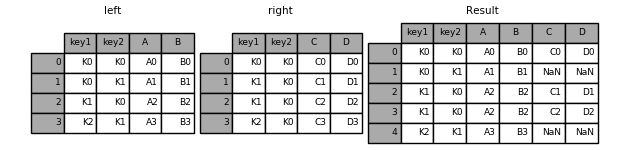

(Пример `"right" merge`)

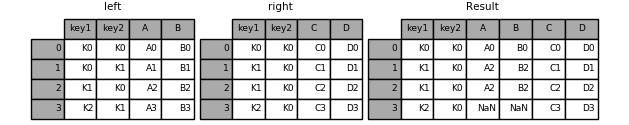

In [114]:
pd.merge(df_a, df_b, right_index=True, left_index=True)

subject_id_x first_name_x last_name_x subject_id_y first_name_y last_name_y
2            3        Allen         Ali            4        Billy      Bonder
3            4        Alice        Aoni            5        Brian       Black
4            5       Ayoung     Atiches            6         Bran     Balwner

## Общее правило, как понять, делает ли функция то, что вам нужно:

* Запустите интерпретатор Python;
* Придумайте **хороший пример ваших данных**;
* Запустите функцию на ваших данных;
* Проверьте, сработала ли функция **так, как вы хотели**.

Перед этим также можно **погуглить** =)

# На этом всё!

Полную документацию Pandas смотрите на сайте:

https://pandas.pydata.org/pandas-docs/stable/

В Pandas, как и в NumPy, есть куча сверхполезных для вас функций, так что не поленитесь зайти и посмотреть :^)

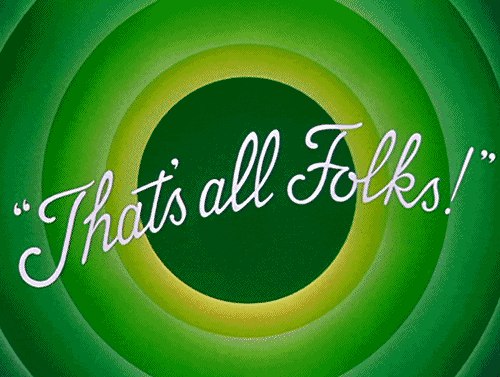